#We do the followings in this notebook
1. Principal Component Analysis \\
    -Keep numerical variables only \\
    -Drop not distance variables e.g. unique_id \\
    -Normalizing variables to avoid scale effect \\
    -Run PCA algrorithm to get certain PCs

2. Clustering Analysis \\
   -Cluster/group the data based on similarities     between different PC values. \\
   -Make a choice to select appropriate number of clusters. 
  

Importing Libraries and setting directories

In [ ]:
import numpy as np
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#setting current directory 
%ls drive/MyDrive/UCR/Q2/STAT206/Project
%cd drive/MyDrive/UCR/Q2/STAT206/Project

Mounted at /content/drive
 Analysis.ipynb    data.txt   master_file.csv
 cleaning.ipynb    data.zip  'Project Proposal.gdoc'
 data.sample.csv   dest.zip  'STAT206_Project Report.gdoc'
/content/drive/MyDrive/UCR/Q2/STAT206/Project




## Using master file : merged of data.zip and dest.zip


In [ ]:
data = pd.read_csv('master_file.csv')

In [ ]:
data.shape

(106847, 173)

In [ ]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106847 entries, 0 to 106846
Columns: 173 entries, Unnamed: 0.2 to popular_attraction_zoo
dtypes: float64(145), int64(16), object(12)
memory usage: 141.0+ MB


Just checking if there is any missing values

In [ ]:
data.isna().sum().sum()  

0

##Keeping Numeric Variables Only for clustering
A distance can be caluclated between two numerical variables, therefore, we can only use numeric variables for clustering

In [ ]:
df=data.select_dtypes(include=np.number)
df.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,user_id,user_location_latitude,user_location_longitude,orig_destination_distance,is_mobile,is_package,channel,...,popular_naturalfeature_volcanoes,popular_activity_walking,popular_activity_waterskiing,popular_naturalfeature_waterfalls,popular_attraction_waterparks,popular_activity_whalewatching,popular_naturalfeature_wildlife,popular_activity_windsurfing,popular_attraction_wineries,popular_attraction_zoo
0,3,3,1348,458489400,40.494050,-82.728010,1005.0921,0,0,541,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
1,4,4,1975,-78578705,40.667806,-73.791989,1069.4145,0,0,324,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
2,5,5,1980,-78578705,40.667806,-73.791989,1069.4145,0,0,262,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
3,6,6,1985,-78578705,40.667806,-73.791989,1069.4145,0,0,324,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
4,7,7,1986,-78578705,40.667806,-73.791989,1069.4145,0,0,324,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933


In [ ]:
df = df.drop(df.columns[[0, 1,2,3]], axis=1)
df = df.drop('hotel_id', axis=1)

df.head()

,user_location_latitude,user_location_longitude,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,...,popular_naturalfeature_volcanoes,popular_activity_walking,popular_activity_waterskiing,popular_naturalfeature_waterfalls,popular_attraction_waterparks,popular_activity_whalewatching,popular_naturalfeature_wildlife,popular_activity_windsurfing,popular_attraction_wineries,popular_attraction_zoo
0,40.494050,-82.728010,1005.0921,0,0,541,2,0,1,18654373,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
1,40.667806,-73.791989,1069.4145,0,0,324,2,0,1,18654373,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
2,40.667806,-73.791989,1069.4145,0,0,262,2,0,1,18654373,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
3,40.667806,-73.791989,1069.4145,0,0,324,1,0,1,18654373,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933
4,40.667806,-73.791989,1069.4145,0,0,324,2,0,1,18654373,...,-2.274479,-1.870351,-2.218907,-2.259097,-2.274043,-2.273714,-2.274479,-2.22236,-2.274479,-2.272933


#Normalizing all variables before PCA
Some of the variables may have larger variation just because of big numbers e.g. income and some may have lower variation e.g. (0,1) type binary variable. Therefore, we need to normalize them to give each of them equal importance. 

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=df.shape[1])

# Fit PCA on data
pca.fit(df)

num_components = len(np.where(pca.explained_variance_ > 1)[0])

# Select principal components
principal_components = pca.components_[:num_components,:]


# Transform the dataset
df_transformed = pca.transform(df)

print(num_components)

9


**Proportion of the variation explained by Principal Components**

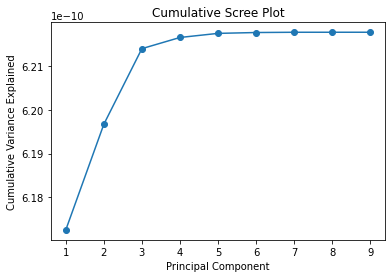

In [ ]:
cum_var_exp = np.cumsum(var_exp)

# plot the graph
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Scree Plot')
plt.show()

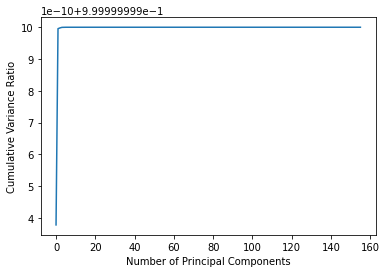

In [ ]:
variance_ratio = pca.explained_variance_ratio_

# Get the cumulative sum of variance ratios
cumulative_var_ratio = np.cumsum(variance_ratio)

# Plot the cumulative variance ratio as a function of the number of principal components
plt.plot(cumulative_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

#Clustering on the basis of 4-5 Principal Components found above 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# Compute linkage matrix
#Z = linkage(df_transformed, 'single')  #ward method is not running because it is computationally heavy 

# Plot dendrogram
#plt.figure(figsize=(10, 5))
#dendrogram(Z)
#plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Create a KMeans object
kmeans = KMeans(n_clusters=5)

# Fit the KMeans object to the PCA transformed data
kmeans.fit(df_transformed)

# Get the cluster labels
cluster_labels = kmeans.labels_

print(cluster_labels)

#dataframe after getting cluster labels. 
data_clust=data.assign(cluster_number=cluster_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 ... 1 1 1]


#We have prepared a clusterd dataframe: now we'll analyze it based on cluster ID


Cluster Counts:
0    45338
1    33768
2    10809
4     9505
3     7427
Name: cluster_number, dtype: int64


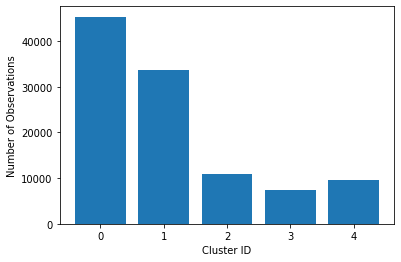

In [ ]:
# Calculate the number of observations in each cluster
cluster_counts = data_clust['cluster_number'].value_counts()
print('\nCluster Counts:')
print(cluster_counts)

# Plot a histogram of the cluster counts
import matplotlib.pyplot as plt
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster ID')
plt.ylabel('Number of Observations')
plt.show()

String Data : Frequency Analysis

In [ ]:
freq = data_clust.groupby('cluster_number')['user_location_city'].apply(lambda x: x.value_counts().index[0]).reset_index()

# print the result
print(freq)

   cluster_number user_location_city
0               0        LOS ANGELES
1               1              MIAMI
2               2           NEW YORK
3               3           NEW YORK
4               4              MIAMI


Most frequent hotel popularity bands by group

In [ ]:
freq = data_clust.groupby('cluster_number')['popularity_band'].apply(lambda x: x.value_counts().index[0]).reset_index()
# print the result
print(freq)

   cluster_number popularity_band
0               0              VH
1               1              VH
2               2              VH
3               3              VH
4               4              VH


Whether groups care about hotel brand

In [ ]:
freq = data_clust.groupby('cluster_number')['prop_is_branded'].apply(lambda x: x.value_counts().index[0]).reset_index()
print(freq)

   cluster_number  prop_is_branded
0               0                1
1               1                1
2               2                1
3               3                1
4               4                1


# **Looking at the characteristics of clusters **

In [ ]:
# Calculate the mean values of each feature for each cluster
cluster_means = data_clust.groupby('cluster_number').mean()

*which group booked more*

In [ ]:
#package pattern
print(cluster_means['is_booking'])

cluster_number
0    0.069324
1    0.111466
2    0.082709
3    0.097078
4    0.117938
Name: is_booking, dtype: float64


In [ ]:
#package pattern
print(cluster_means['is_package'])

cluster_number
0    0.272884
1    0.081260
2    0.271996
3    0.103003
4    0.154655
Name: is_package, dtype: float64


In [ ]:
#pattern in mobile use
print(cluster_means['is_mobile'])

cluster_number
0    0.211214
1    0.224621
2    0.264317
3    0.252188
4    0.254392
Name: is_mobile, dtype: float64


In [ ]:
#pattern in location
print(cluster_means[ 'user_location_longitude'])

cluster_number
0   -91.631988
1   -90.082780
2   -89.098667
3   -96.654227
4   -95.480668
Name: user_location_longitude, dtype: float64


Groupwise correlation between package and booking

In [ ]:
df1=data_clust[['is_booking',  'orig_destination_distance'  ,'cluster_number']]

#groupwise correlation
corr_df = df1.groupby('cluster_number').corr()

# Print the resulting correlation DataFrame
print(corr_df)

                                          is_booking  \
cluster_number                                         
0              is_booking                   1.000000   
               orig_destination_distance   -0.039978   
1              is_booking                   1.000000   
               orig_destination_distance   -0.055170   
2              is_booking                   1.000000   
               orig_destination_distance   -0.084553   
3              is_booking                   1.000000   
               orig_destination_distance   -0.039681   
4              is_booking                   1.000000   
               orig_destination_distance   -0.115386   

                                          orig_destination_distance  
cluster_number                                                       
0              is_booking                                 -0.039978  
               orig_destination_distance                   1.000000  
1              is_booking                      

In [ ]:
df2=data_clust[['is_booking',  'popular_naturalfeature_waterfalls', 'popular_attraction_waterparks', 'popular_activity_whalewatching', 'popular_naturalfeature_wildlife', 'popular_activity_windsurfing', 'popular_attraction_wineries', 'popular_attraction_zoo' ,'cluster_number']]

#groupwise correlation
corr_df = df2.groupby('cluster_number').corr()

# Print the resulting correlation DataFrame
print(corr_df)

                                                  is_booking  \
cluster_number                                                 
0              is_booking                           1.000000   
               popular_naturalfeature_waterfalls    0.020268   
               popular_attraction_waterparks        0.018445   
               popular_activity_whalewatching       0.006642   
               popular_naturalfeature_wildlife      0.034373   
               popular_activity_windsurfing         0.015107   
               popular_attraction_wineries          0.026931   
               popular_attraction_zoo               0.033046   
1              is_booking                           1.000000   
               popular_naturalfeature_waterfalls    0.009812   
               popular_attraction_waterparks        0.002212   
               popular_activity_whalewatching       0.033724   
               popular_naturalfeature_wildlife      0.039579   
               popular_activity_windsurf

popular_weather_sunnyweather  popular_activity_sunrise popular_activity_snowtubing  popular_activity_snowboarding 
popular_social_nightclubs  popular_lifestyle_nightlife popular_naturalfeature_hotsprings  popular_activity_hunting



In [ ]:
df_party=data_clust[['is_booking',  'popular_lifestyle_nightlife', 'popular_activity_dancing', 'popular_social_nightclubs', 'popular_entertainment_casino','cluster_number']]
#groupwise correlation
corr_df = df_party.groupby('cluster_number').corr()
print(corr_df)

                                             is_booking  \
cluster_number                                            
0              is_booking                      1.000000   
               popular_lifestyle_nightlife     0.009802   
               popular_activity_dancing        0.003098   
               popular_social_nightclubs      -0.010340   
               popular_entertainment_casino    0.004533   
1              is_booking                      1.000000   
               popular_lifestyle_nightlife     0.011734   
               popular_activity_dancing        0.003528   
               popular_social_nightclubs       0.004165   
               popular_entertainment_casino    0.029406   
2              is_booking                      1.000000   
               popular_lifestyle_nightlife     0.031347   
               popular_activity_dancing       -0.042327   
               popular_social_nightclubs      -0.049760   
               popular_entertainment_casino    0.003831 

In [ ]:
df_sport=data_clust[['is_booking',  'popular_activity_basketball', 'popular_activity_baseball','cluster_number']]
#groupwise correlation
corr_df = df_sport.groupby('cluster_number').corr()
print(corr_df)


                                            is_booking  \
cluster_number                                           
0              is_booking                     1.000000   
               popular_activity_basketball    0.039264   
               popular_activity_baseball      0.049626   
1              is_booking                     1.000000   
               popular_activity_basketball    0.071232   
               popular_activity_baseball      0.068441   
2              is_booking                     1.000000   
               popular_activity_basketball    0.134241   
               popular_activity_baseball      0.146793   
3              is_booking                     1.000000   
               popular_activity_basketball    0.048982   
               popular_activity_baseball      0.014594   
4              is_booking                     1.000000   
               popular_activity_basketball    0.116943   
               popular_activity_baseball      0.083474   

             

In [ ]:
df_food=data_clust[['is_booking',  'popular_food_finedining', 'popular_food_food','popular_food_coffee','cluster_number']]
#groupwise correlation
corr_df = df_food.groupby('cluster_number').corr()
print(corr_df)


                                        is_booking  popular_food_finedining  \
cluster_number                                                                
0              is_booking                 1.000000                 0.023040   
               popular_food_finedining    0.023040                 1.000000   
               popular_food_food         -0.039549                -0.664380   
               popular_food_coffee        0.012175                -0.667823   
1              is_booking                 1.000000                 0.055948   
               popular_food_finedining    0.055948                 1.000000   
               popular_food_food         -0.033876                -0.454646   
               popular_food_coffee        0.049047                -0.328566   
2              is_booking                 1.000000                 0.092210   
               popular_food_finedining    0.092210                 1.000000   
               popular_food_food         -0.106447  

#Printing important variables for is_booking came out of LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
# set the warning filter to "ignore"
warnings.filterwarnings("ignore")


#dropping target variable so that resulting dataframe is predictors only
df_x = df.drop('is_booking', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, df.is_booking, 
                                                           test_size=0.2)

# standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df_x)
y = df.is_booking

# create the LassoCV model
lasso_cv = LassoCV(cv=5)

# fit the model on the data
lasso_cv.fit(X, y)

# print the optimal alpha value
#print("Optimal alpha:", lasso_cv.alpha_)

# print the coefficients of the model
#print("Coefficients:", lasso_cv.coef_)

imp_var_number= sum(lasso_cv.coef_!=0)
zero_var_number= sum(lasso_cv.coef_==0)
print("The number of important variables are:", imp_var_number)
print("The number of not-important variables are:", zero_var_number)

The number of important variables are: 65
The number of not-important variables are: 90


In [ ]:
# find the non-zero coefficients and their corresponding feature names
coef = lasso_cv.coef_
features = df_x.columns

nonzero_features = features[coef != 0]
zero_features = features[coef == 0]

# print the non-zero features
print("Non-zero features:", nonzero_features)
print("Useless features:", zero_features)

Non-zero features: Index(['user_location_latitude', 'user_location_longitude',
       'orig_destination_distance', 'is_mobile', 'is_package', 'channel',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'prop_is_branded', 'prop_starrating', 'cnt', 'srch_destination_type_id',
       'srch_destination_longitude', 'popular_social_bars',
       'popular_naturalfeature_beach', 'popular_food_beer',
       'popular_activity_birdwatching', 'popular_activity_boating',
       'popular_field_business', 'popular_social_cafes',
       'popular_activity_camping', 'popular_entertainment_casino',
       'popular_architecture_cathedral', 'popular_tourism_chinatown',
       'popular_architecture_churches', 'popular_food_coffee',
       'popular_activity_coralreefs', 'popular_activity_dancing',
       'popular_activity_dining', 'popular_activity_diving',
       'popular_social_familyfriendly', 'popular_naturalfeature_forests',
       'popular_historical_historical', 'popular_activity_h

Reducing dataframe to important variables only. Removing unimportant variables from dataframe

In [ ]:
df_imp = df_x[nonzero_features]

#adding target variable 
#df_imp['is_booking']=y
#len(df_imp.columns)


#Finding Importance Score using Random Forest (on df_imp)
We use the important variables obtained from LASSO to predict booking. We also obtain the importance score of each predictor in order to know what matters the most for predicting the bookings.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Load data
X=df_imp
y=y   #from previous codes y is 'is_booking' column of our dataframe
# Train random forest model
model = RandomForestClassifier(n_estimators=500, random_state=50)
model.fit(X, y)
feature_names = list(df_imp.columns)

# Get feature importances
importances = model.feature_importances_

# create a list of tuples, where each tuple contains a feature name and its importance score
feature_importances = list(zip(feature_names, importances))

# sort the feature importances by importance score in descending order
feature_importances.sort(key=lambda x: x[1], reverse=True)

# print the feature importances in descending order
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

orig_destination_distance: 0.10479783261553656
user_location_latitude: 0.10166195008649037
user_location_longitude: 0.10047539864219124
prop_starrating: 0.08686779694591934
channel: 0.0764183850953588
cnt: 0.05857497341120471
srch_adults_cnt: 0.042068059747152935
prop_is_branded: 0.040995096750531805
srch_children_cnt: 0.026933814016622926
is_mobile: 0.020175820399274864
srch_rm_cnt: 0.0128270787405801
is_package: 0.012073801309499345
srch_destination_longitude: 0.009154463183962682
popular_landmark_university: 0.0081327917039344
popular_activity_hockey: 0.008114688493287945
popular_field_business: 0.007447794713850649
popular_activity_skiing: 0.007427370381222555
popular_food_beer: 0.00739308770969173
popular_food_coffee: 0.007377648710953645
popular_activity_tours: 0.007035274730357352
popular_activity_walking: 0.006901760271654517
popular_lifestyle_relaxing: 0.0068993672788929105
popular_naturalfeature_beach: 0.006859076930928296
popular_social_bars: 0.006825361252196178
popular_act

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_imp, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training set
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8650444548432382


Acuuracy using all the variables (including unimportant ones)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training set
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8648104819840898
